📄 Dataset shape: (153, 76)
🧾 First 5 rows:
       0      1     2     3      4     5     6      7     8     9  ...    66  \
0  1280 -16200 -2608  1256 -16704 -2728  1176 -16648 -2704  1328  ...  7540   
1  -360 -17784 -2780   968 -18052 -1876  2756 -21764 -6356   152  ...  3128   
2  2260 -15384 -2488  -484 -16652   364  5836 -18512 -1788  6028  ...  2064   
3  6324 -18412 -2940  2728 -17368 -1508  4032 -14768 -3552   448  ...  4396   
4  2964 -16852 -1160  7344 -15336   -60  7540 -15880 -3304  5412  ...  1656   

      67    68    69     70    71    72     73    74   label  
0 -15880 -3304  5412 -17628 -4284  5724 -15228   640  normal  
1 -17552 -3284 -1704 -16916  -700 -1748 -14532   644  normal  
2 -15712 -2004 -1004 -16272 -2216  1900 -18144 -3476  normal  
3 -15952 -2152  6296 -14908 -1344  2936 -17544 -2836  normal  
4 -15096 -1660  3524 -16740 -4480  2608 -15228 -4056  normal  

[5 rows x 76 columns]

🔢 Label Mapping: {0: 'fall', 1: 'normal'}

✅ Accuracy: 1.0

📊 Classification Re

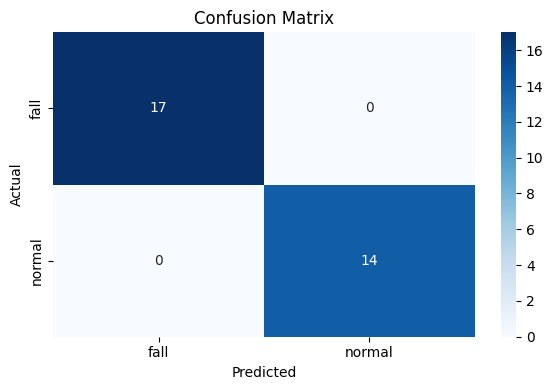

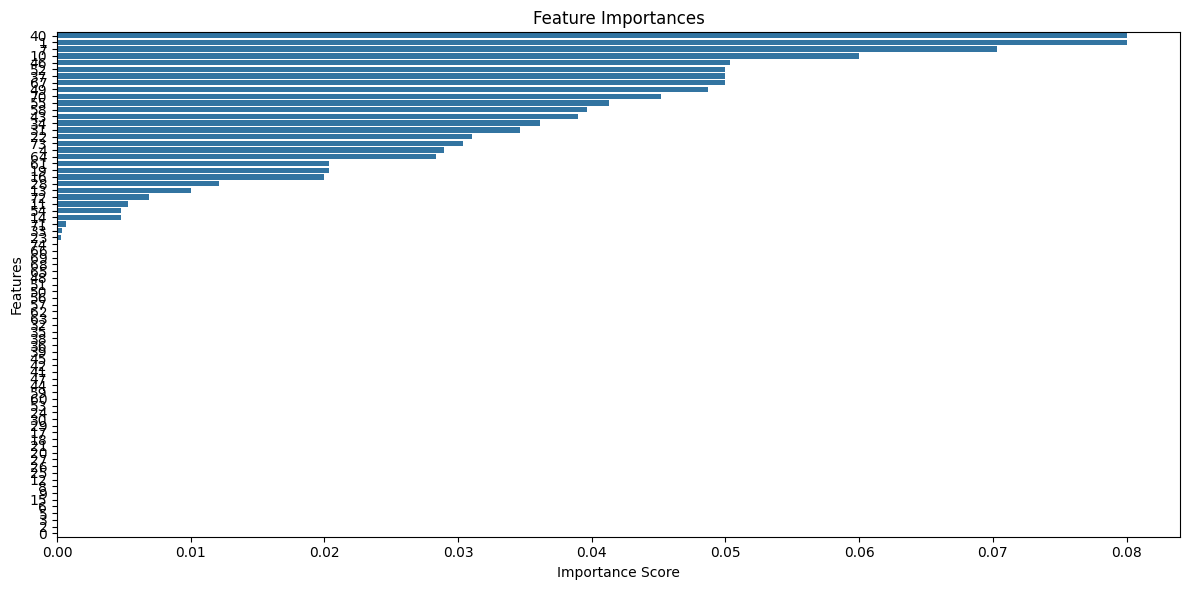

/tmp/ipython-input-4-1492754501.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='Set2')


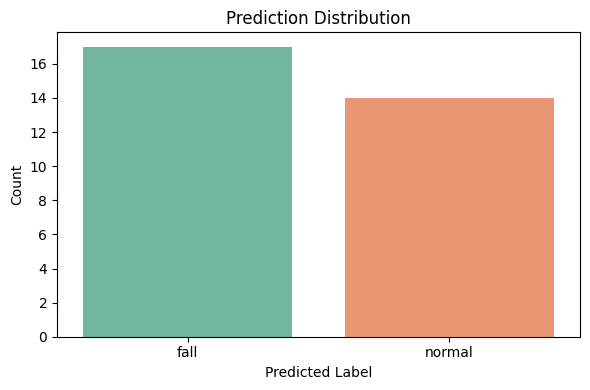

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

# -------------------- 📥 Load Dataset --------------------
df = pd.read_csv('final_fall_dataset.csv')  # make sure your CSV reflects the correct file

# Display basic info
print("📄 Dataset shape:", df.shape)
print("🧾 First 5 rows:\n", df.head())

# -------------------- 🧪 Features & Labels --------------------
X = df.drop('label', axis=1)
y = df['label']

# Encode labels: "fall" → 1, "normal" → 0
y_encoded = y.astype('category').cat.codes
label_mapping = dict(enumerate(y.astype('category').cat.categories))
print("\n🔢 Label Mapping:", label_mapping)

# -------------------- ✂️ Train-Test Split --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# -------------------- 🌳 Train RandomForest Model --------------------
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# -------------------- 🔍 Evaluate --------------------
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred, target_names=label_mapping.values()))
print("\n🌀 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# -------------------- 🔥 Confusion Matrix Heatmap --------------------
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# -------------------- 💡 Feature Importance --------------------
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# -------------------- 📈 Prediction Distribution --------------------
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred, palette='Set2')
plt.title("Prediction Distribution")
plt.xticks(ticks=np.arange(len(label_mapping)), labels=label_mapping.values())
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [5]:
!pip install micromlgen
from micromlgen import port

# Export the trained model
c_code = port(clf)

# Save to a header file
with open("model.h", "w") as f:
    f.write(c_code)
